In [37]:
import pandas as pd
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt 
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = None
pd.options.display.max_columns = None
sns.set()

In [38]:
df = pd.read_csv('Madrid_cleaned_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17452 entries, 0 to 17451
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 17452 non-null  int64  
 1   district           17452 non-null  object 
 2   sq_mt_built        17452 non-null  float64
 3   n_rooms            17452 non-null  int64  
 4   n_bathrooms        17452 non-null  int64  
 5   buy_price          17452 non-null  int64  
 6   buy_price_by_area  17452 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 954.5+ KB


In [39]:
df.head()

,id,district,sq_mt_built,n_rooms,n_bathrooms,buy_price,buy_price_by_area
0,21740,San Andrés,94.00,2,2,144247,1535
1,21738,Los Rosales,108.00,2,2,260000,2407
2,21737,San Andrés,126.00,4,2,195000,1548
3,21736,San Andrés,120.00,5,2,190000,1583
4,21735,Villaverde,125.00,3,2,198500,1588


In [40]:
df.id = df.id.astype('object')

### Univariate Analysis

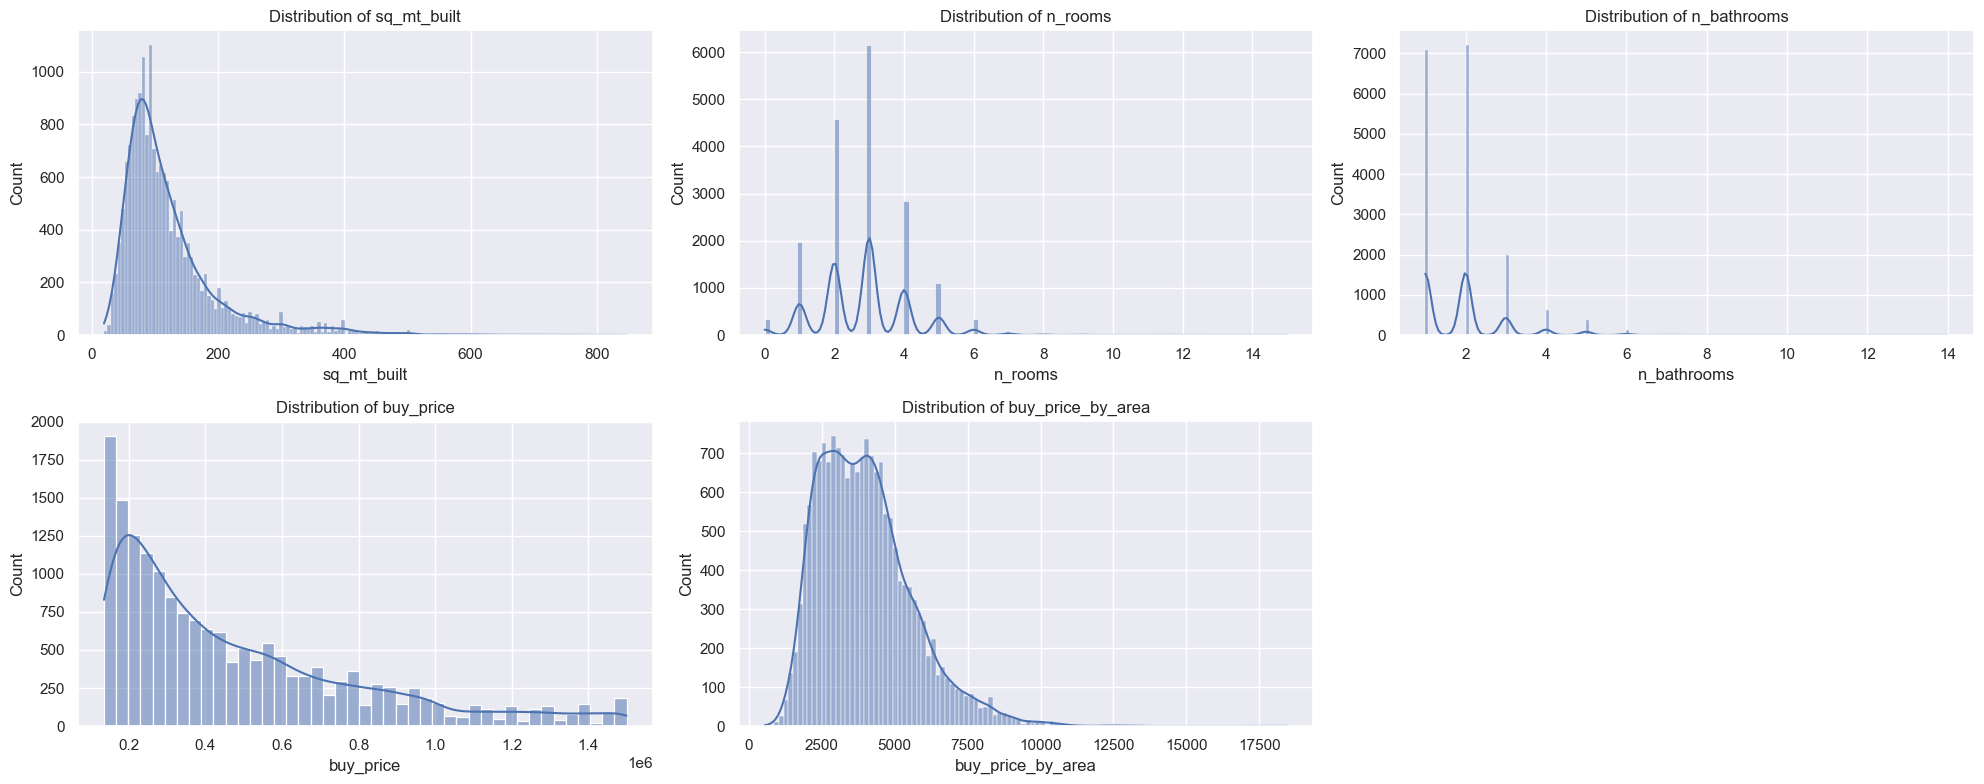

In [41]:
# Numerical Columns
plt.figure(figsize=(20, 8))
for e, i in enumerate(df.columns[2:]):
    plt.subplot(2, 3, e+1)
    sns.histplot(df[i], kde=True)
    plt.title('Distribution of ' + i);
    plt.tight_layout();
    

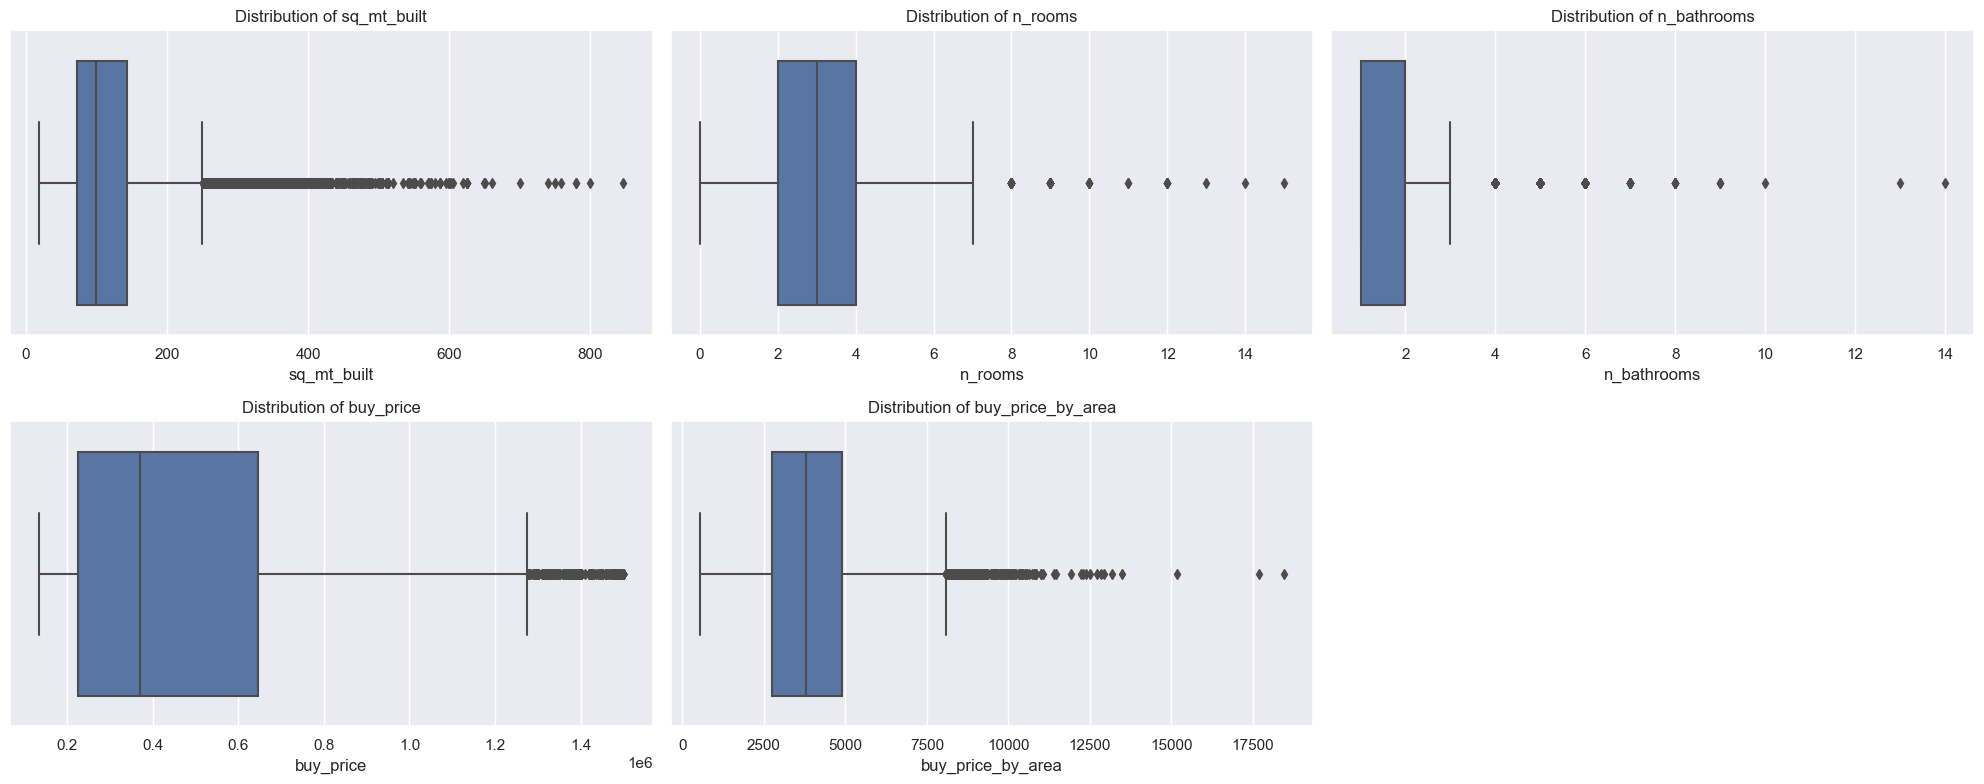

In [42]:
# Numerical Columns
plt.figure(figsize=(20,8))
for e, i in enumerate(df.columns[2:]):
    plt.subplot(2, 3, e+1)
    plt.title('Distribution of ' + i)
    sns.boxplot(x=df[i])
    plt.tight_layout();

In [43]:
px.bar(df.district.value_counts(), title= 'Distribution of Districts in Madrid')

In [44]:
df.groupby('district', as_index=False)['buy_price_by_area'].mean().sort_values(by='buy_price_by_area', ascending=False).head(10)

,district,buy_price_by_area
113,Recoletos,"8,359.25"
31,Castellana,"6,862.58"
127,Trafalgar,"6,483.60"
53,El Viso,"6,390.26"
62,Goya,"6,161.42"
5,Almagro,"6,076.60"
75,Lista,"6,051.35"
17,Barrio de Salamanca,"5,996.82"
37,Chueca-Justicia,"5,905.52"
67,Ibiza,"5,724.47"


# Bivariate Analysis

#### Correlation Coeffcient

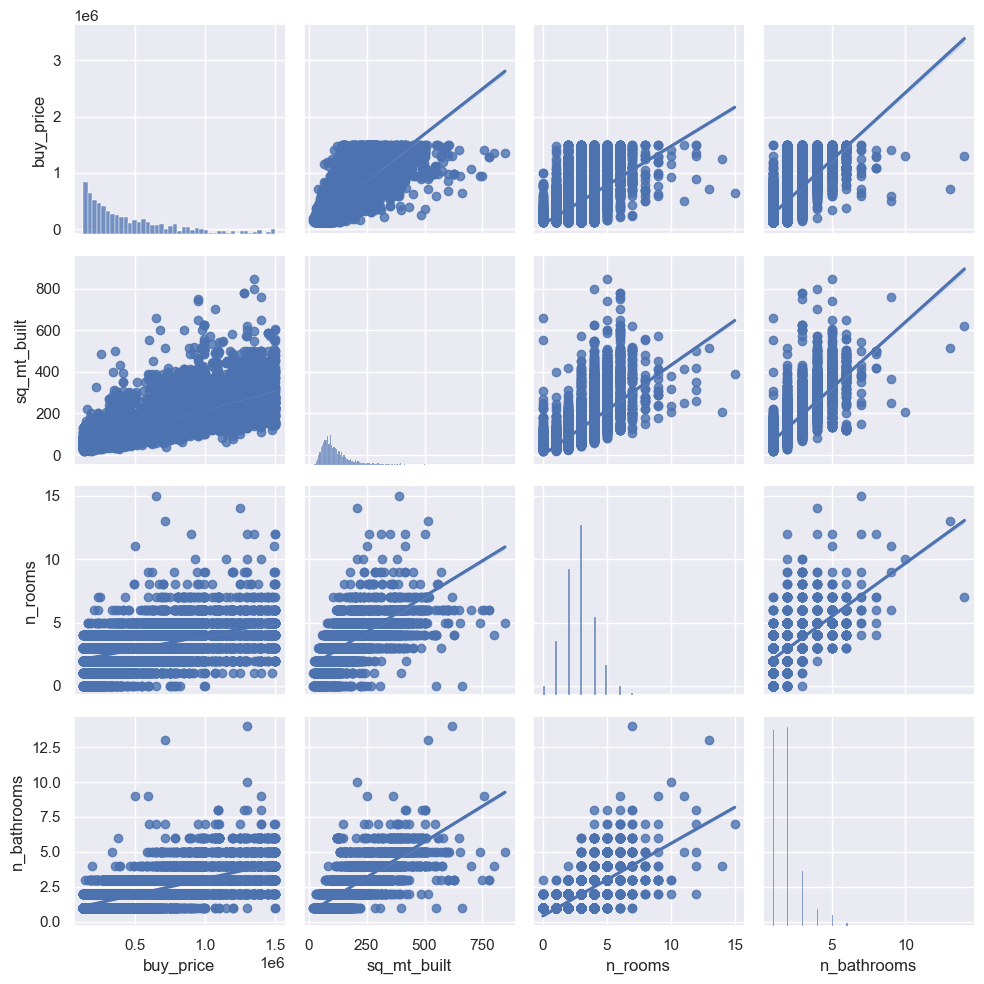

In [45]:
corr = df[['buy_price','sq_mt_built', 'n_rooms', 'n_bathrooms']]

sns.pairplot(corr, kind='reg')
plt.tight_layout();

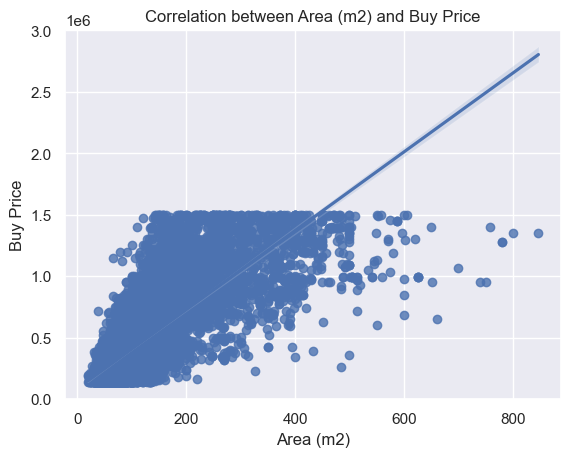

In [46]:
sns.regplot(data=df, x='sq_mt_built', y='buy_price')
plt.title("Correlation between Area (m2) and Buy Price")
plt.xlabel('Area (m2)')
plt.ylabel('Buy Price');

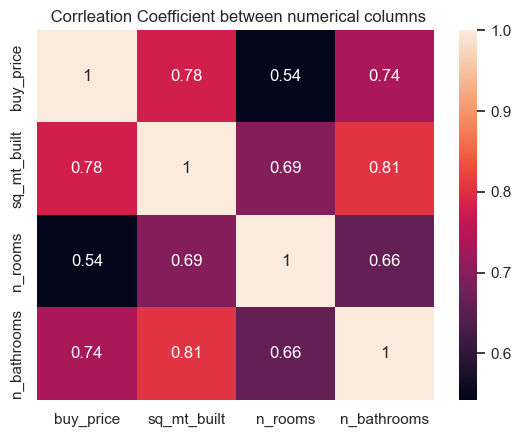

In [47]:
sns.heatmap(corr.corr(), annot=True)
plt.title(' Corrleation Coefficient between numerical columns');

In [48]:
df.head()

,id,district,sq_mt_built,n_rooms,n_bathrooms,buy_price,buy_price_by_area
0,21740,San Andrés,94.00,2,2,144247,1535
1,21738,Los Rosales,108.00,2,2,260000,2407
2,21737,San Andrés,126.00,4,2,195000,1548
3,21736,San Andrés,120.00,5,2,190000,1583
4,21735,Villaverde,125.00,3,2,198500,1588


<font size="+3"><strong>Location or Size: What Influences House Prices in Madrid?</strong></font>

Do housing prices vary by district? If so, which are the most expensive states for purchasing a home?

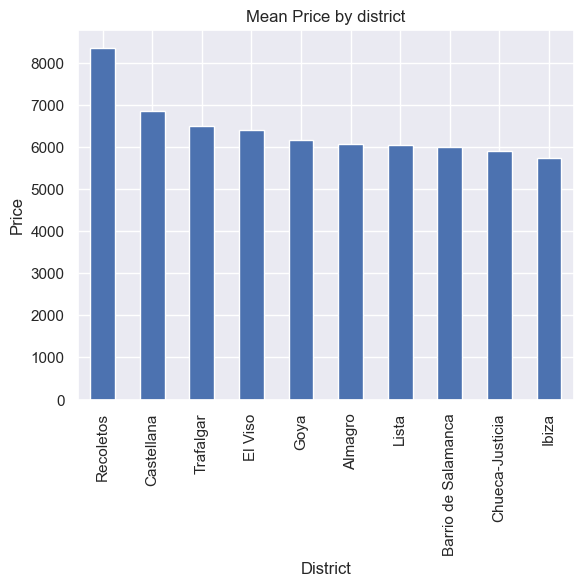

In [49]:
mean_price = df.groupby('district')['buy_price_by_area'].mean().round(2).sort_values(ascending=False)
mean_price.head(10).plot(kind='bar', xlabel='District', ylabel= 'Price', title='Mean Price by district');

In [50]:
reco = df.query('district == "Recoletos"')


# Linear Regression Model

In [51]:
import statsmodels.api  as sm 

reco['intercept'] = 1

lm = sm.OLS(reco.buy_price, reco[['intercept', 'sq_mt_built']])

result = lm.fit()

result.summary()


C:\Users\A.Emad\AppData\Local\Temp\ipykernel_3992\345717210.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              buy_price   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     72.05
Date:                Thu, 16 May 2024   Prob (F-statistic):           2.64e-10
Time:                        14:59:10   Log-Likelihood:                -545.25
No. Observations:                  40   AIC:                             1094.
Df Residuals:                      38   BIC:                             1098.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept    1.525e+05   9.89e+04      1.543      0.131   -4.76e+04    3.53e+05
sq_mt_built  6843.1589    806.219      8.488      0.000    5211.054    8475.263
==============================================================================
Omnibus:                       10.228   Durbin-Watson:                   1.602
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.615
Skew:                          -0.863   Prob(JB):                      0.00495
Kurtosis:                       4.840   Cond. No.                         371.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
x = 300
price = 152500 + 6843.16 * x
print('Predicted Price of Flat in Recoletos with area of {} m2 = {} Euro'.format(x, price))

Predicted Price of Flat in Recoletos with area of 300 m2 = 2205448.0 Euro


# MultiLinear Regression Model

* With Quantitative data

In [53]:
reco.head()

,id,district,sq_mt_built,n_rooms,n_bathrooms,buy_price,buy_price_by_area,intercept
15272,2640,Recoletos,114.00,4,1,750000,6579,1
15278,2632,Recoletos,187.00,3,3,1450000,7754,1
15285,2622,Recoletos,127.00,2,2,990000,7795,1
15286,2620,Recoletos,92.00,2,1,378000,4109,1
15292,2602,Recoletos,45.00,1,1,399000,8867,1


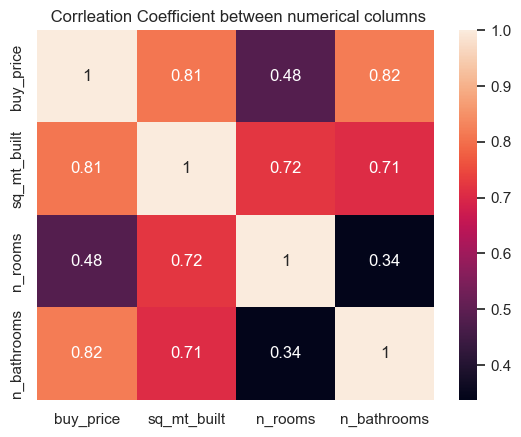

In [54]:
corr = reco[['buy_price', 'sq_mt_built', 'n_rooms', 'n_bathrooms']]
sns.heatmap(corr.corr(), annot=True)
plt.title(' Corrleation Coefficient between numerical columns');

In [55]:
lm = sm.OLS(reco.buy_price, reco[['intercept', 'sq_mt_built', 'n_bathrooms']])

result = lm.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              buy_price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     63.98
Date:                Thu, 16 May 2024   Prob (F-statistic):           9.77e-13
Time:                        14:59:10   Log-Likelihood:                -536.61
No. Observations:                  40   AIC:                             1079.
Df Residuals:                      37   BIC:                             1084.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept    1.212e+05    8.1e+04      1.496      0.143    -4.3e+04    2.85e+05
sq_mt_built  3895.8937    932.012      4.180      0.000    2007.457    5784.330
n_bathrooms   1.96e+05   4.39e+04      4.468      0.000    1.07e+05    2.85e+05
==============================================================================
Omnibus:                        0.313   Durbin-Watson:                   1.536
Prob(Omnibus):                  0.855   Jarque-Bera (JB):                0.372
Skew:                          -0.192   Prob(JB):                        0.830
Kurtosis:                       2.724   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
area = 300
bath = 3
price = 121200 + 3895.9 * area + 196000 * bath
print('Predicted Price of Flat in Recoletos with area of {} m2 and {} bathrooms = {} Euro'.format(area, bath, price))

Predicted Price of Flat in Recoletos with area of 300 m2 and 3 bathrooms = 1877970.0 Euro


In [57]:
lm = sm.OLS(reco.buy_price, reco[['intercept', 'n_rooms', 'n_bathrooms']])

result = lm.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              buy_price   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     47.26
Date:                Thu, 16 May 2024   Prob (F-statistic):           6.46e-11
Time:                        14:59:11   Log-Likelihood:                -541.15
No. Observations:                  40   AIC:                             1088.
Df Residuals:                      37   BIC:                             1093.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept    2.089e+05   8.58e+04      2.435      0.020     3.5e+04    3.83e+05
n_rooms      7.603e+04      3e+04      2.535      0.016    1.53e+04    1.37e+05
n_bathrooms  2.942e+05   3.69e+04      7.977      0.000    2.19e+05    3.69e+05
==============================================================================
Omnibus:                        0.097   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.953   Jarque-Bera (JB):                0.259
Skew:                           0.096   Prob(JB):                        0.879
Kurtosis:                       2.656   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
room = 3
bath = 3
price = 208900 + 76030 * room + 294200 * bath
print('Predicted Price of Flat in Recoletos with {} Rooms and {} bathrooms = {} Euro'.format(room, bath, price))

Predicted Price of Flat in Recoletos with 3 Rooms and 3 bathrooms = 1319590 Euro


# -- DUMMY VARIABLES

In [68]:
df.head()

,id,district,sq_mt_built,n_rooms,n_bathrooms,buy_price,buy_price_by_area
0,21740,San Andrés,94.00,2,2,144247,1535
1,21738,Los Rosales,108.00,2,2,260000,2407
2,21737,San Andrés,126.00,4,2,195000,1548
3,21736,San Andrés,120.00,5,2,190000,1583
4,21735,Villaverde,125.00,3,2,198500,1588


In [67]:
df.district.nunique()

146

In [69]:
df_dummy = df.query('district in ("Recoletos", "Castellana", "Trafalgar")')
df_dummy.head()

,id,district,sq_mt_built,n_rooms,n_bathrooms,buy_price,buy_price_by_area
8571,10805,Trafalgar,68.00,2,1,510000,7500
8624,10742,Trafalgar,103.00,2,2,980000,9515
8625,10741,Trafalgar,103.00,2,2,960000,9320
8626,10740,Trafalgar,30.00,0,1,250000,8333
8633,10732,Trafalgar,95.00,4,1,239000,2516


In [60]:
pd.get_dummies(df_dummy.district).head()

,Castellana,Recoletos,Trafalgar
8571,False,False,True
8624,False,False,True
8625,False,False,True
8626,False,False,True
8633,False,False,True


In [62]:
df_dummy[['Cast', 'Reco', 'Traf']] = pd.get_dummies(df_dummy['district'], dtype= 'int')
df_dummy.head()

C:\Users\A.Emad\AppData\Local\Temp\ipykernel_3992\3250966332.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,district,sq_mt_built,n_rooms,n_bathrooms,buy_price,buy_price_by_area,Cast,Reco,Traf
8571,10805,Trafalgar,68.00,2,1,510000,7500,0,0,1
8624,10742,Trafalgar,103.00,2,2,980000,9515,0,0,1
8625,10741,Trafalgar,103.00,2,2,960000,9320,0,0,1
8626,10740,Trafalgar,30.00,0,1,250000,8333,0,0,1
8633,10732,Trafalgar,95.00,4,1,239000,2516,0,0,1


In [65]:
df_dummy['intercept'] = 1

lm = sm.OLS(df_dummy.buy_price, df_dummy[['intercept', 'Cast', 'Traf']])

result = lm.fit()

result.summary()

C:\Users\A.Emad\AppData\Local\Temp\ipykernel_3992\3351953690.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              buy_price   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     30.15
Date:                Thu, 16 May 2024   Prob (F-statistic):           1.06e-12
Time:                        15:02:02   Log-Likelihood:                -4425.0
No. Observations:                 316   AIC:                             8856.
Df Residuals:                     313   BIC:                             8867.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9.446e+05   4.64e+04     20.370      0.000    8.53e+05    1.04e+06
Cast       -1.339e+05   6.09e+04     -2.198      0.029   -2.54e+05    -1.4e+04
Traf       -3.455e+05   5.04e+04     -6.856      0.000   -4.45e+05   -2.46e+05
==============================================================================
Omnibus:                       15.307   Durbin-Watson:                   1.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.932
Skew:                           0.296   Prob(JB):                      0.00697
Kurtosis:                       2.365   Cond. No.                         6.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
df_dummy['intercept'] = 1

lm = sm.OLS(df_dummy.buy_price, df_dummy[['intercept', 'Cast', 'Traf', 'sq_mt_built']])

result = lm.fit()

result.summary()

C:\Users\A.Emad\AppData\Local\Temp\ipykernel_3992\953914908.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              buy_price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     227.2
Date:                Thu, 16 May 2024   Prob (F-statistic):           3.93e-78
Time:                        15:03:18   Log-Likelihood:                -4269.8
No. Observations:                 316   AIC:                             8548.
Df Residuals:                     312   BIC:                             8563.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept    3.773e+05   3.78e+04      9.992      0.000    3.03e+05    4.52e+05
Cast        -1.623e+05   3.74e+04     -4.341      0.000   -2.36e+05   -8.87e+04
Traf        -2.524e+05   3.12e+04     -8.101      0.000   -3.14e+05   -1.91e+05
sq_mt_built  4901.5431    214.723     22.827      0.000    4479.055    5324.032
==============================================================================
Omnibus:                        3.518   Durbin-Watson:                   1.489
Prob(Omnibus):                  0.172   Jarque-Bera (JB):                3.267
Skew:                           0.193   Prob(JB):                        0.195
Kurtosis:                       3.315   Cond. No.                         612.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""